# Лабораторная работа 1
## Метрические Алгоритмы

Задание 1: Применить метод K ближайших соседей (ядерный), взвешенный алгоритмом STOLP для пяти классов, сгенерированных с помощью MakeClassification

Задание 2*: для сгенерированного вами Датасета, сгенерировать профиль компактности

Задание 3: для сгенерированного вами Датасета, произвести оптимизацию по выбору ширины окна

Задание 4: найти датасет с картинками (2-3 класса) небольшой (100 картинок достаточно)

Найти метод библиотеку для построения embedding (векторизации) изображений ()
Применить этот метод для своих картинок
Применить без оптимизации kNN для полученного датасета из векторизванных картинок

Задание 5*: Сфотографируйте свои фотографии (2-3) и повторите Задание 4 с ними.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

## Задание 1
### Создаём Датасет

In [6]:
X, Y = make_classification(n_samples=250, n_features=3, 
                           n_informative=3, n_classes=5, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

### Запускаем Метод ближайшего соседа

In [7]:
from sklearn.decomposition import PCA # пять классов слишком много для двух функций. 
# а три функции уже много для графиков (не двухмерное). Данный модуль (Метод Главных Компонент) позволит сжать для двухмерного представления

In [8]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)
    
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train) #Используем метод главных компонент для сжатия многомерного массива в двухмерное представление
_ = model.fit(X_train2, Y_train)
X_test2 = pca.fit_transform(X_test)

C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


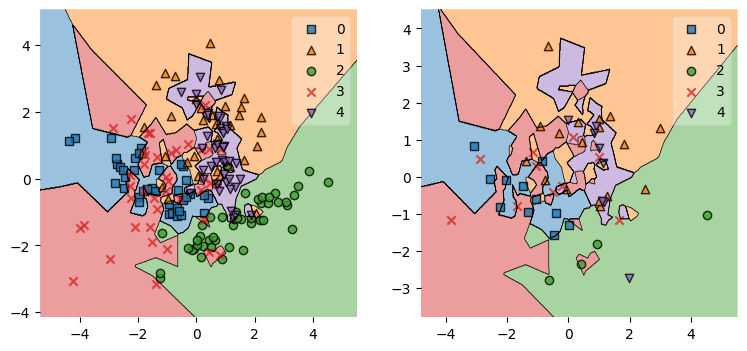

In [9]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train2, Y_train, model, ax=ax[0])
plot_decision_regions(X_test2, Y_test, model, ax=ax[1])

plt.show()

### Запускаем Ядерное взвешивание Окном Парзена

In [10]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision

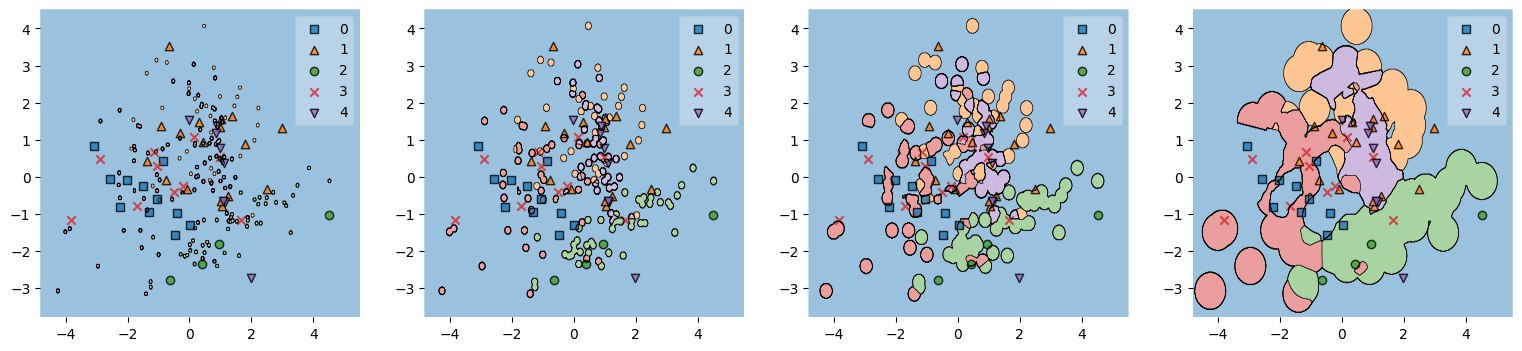

In [13]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train2),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train2, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test2, Y_test, model, ax=ax[i])

plt.show()

C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\himik\anaconda3\envs\MAI_114M\lib\site-packages\mlxtend\plotting\decision

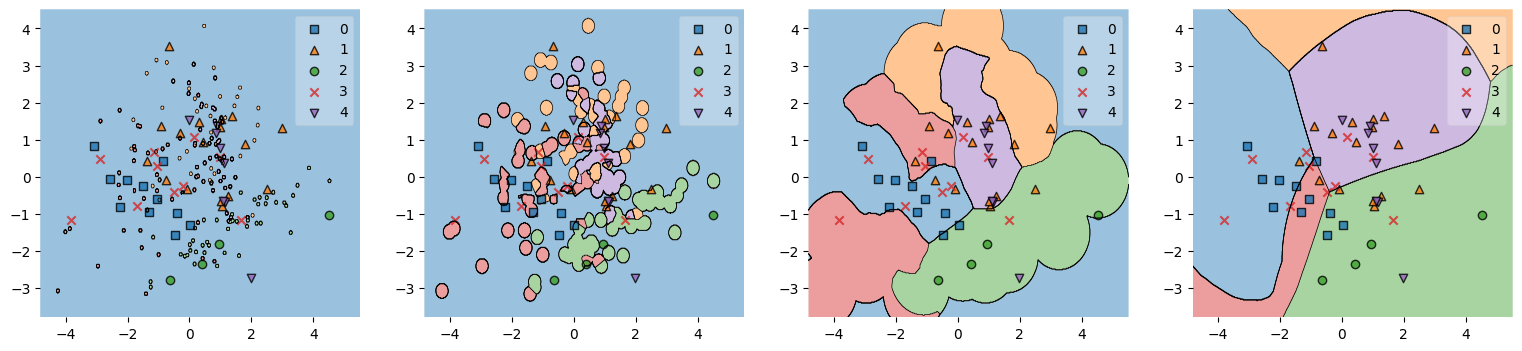

In [14]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train2),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train2, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test2, Y_test, model, ax=ax[i])

plt.show()

### Запускаем Отбор Эталонных объектов

Понятие отступа для метрического классификатора:
$$
M\bigr(x_i\bigr) = \Gamma_{y_i}\bigr(x_i\bigr) - \max_{y\in Y\setminus{y_i}}\Gamma_{y}\bigr(x_i\bigr),
$$
другими словами, отступ показывает насколько истинный класс далеко от другого класса. В случае, если отступ положительный, то предсказание является верным. В случае, если отступ отрицательный, то предсказание является ошибочным.

In [16]:
def K(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [31]:
model = KNeighborsClassifier(n_neighbors=len(X_train2),
                                 weights=lambda x: K(x, h=h))
model.fit(X_train2, Y_train)

M = [s[y] -s[y-1] for s, y in zip(model.scores(X_train2), Y_train)]
M = np.array(sorted(M))

AttributeError: 'KNeighborsClassifier' object has no attribute 'scores'

In [32]:
x = list(range(len(M)))
plt.plot(x, M)

plt.hlines(0, 0, len(x), color='black')
plt.fill_between(x, M, where=M<0, color='red', alpha=0.5)
plt.fill_between(x, M, where=M>0, color='green', alpha=0.5)
plt.show()

NameError: name 'M' is not defined

### Запускаем Алгоритм STOLP для отбора эталонных объектов

In [33]:
def STOLP(X, Y, error=10, model=KNeighborsClassifier(n_neighbors=len(X_train2),
                                 weights=lambda x: K(x, h=h))):
    X, Y = np.array(X), np.array(Y)

    model.fit(X, Y)
    M = np.array(sorted([s[y] -s[y-1] for s, y in zip(model.scores(X), Y)]))

    Omega = []
    Omega.append(np.argmax(M*(Y==1) - 10000*(Y==0)))
    Omega.append(np.argmax(M*(Y==0) - 10000*(Y==1)))

    while len(Omega) != len(X):
        model.fit(X[Omega], Y[Omega])
        M = np.array(sorted([s[y] -s[y-1] for s, y in zip(model.scores(X), Y)]))
        M[Omega] = 10000
        if len(np.where(M <= 0)[0]) < error:
            break
        Omega.append(np.argmin(M))
    
    return Omega

In [34]:
Omega = STOLP(X_train, Y_train)

AttributeError: 'KNeighborsClassifier' object has no attribute 'scores'

In [35]:
model = KNeighborsClassifier(n_neighbors=len(X_train2),
                                 weights=lambda x: K(x, h=h))
model.fit(X_train2[Omega], Y_train[Omega])

M = [s[y] - s[y-1] for s, y in zip(model.scores(X_train2), Y_train)]
M = np.array(sorted(M))

NameError: name 'Omega' is not defined

In [36]:
x = list(range(len(M)))
plt.plot(x, M)

plt.hlines(0, 0, len(x), color='black')
plt.fill_between(x, M, where=M<0, color='red', alpha=0.5)
plt.fill_between(x, M, where=M>0, color='green', alpha=0.5)
plt.show()

NameError: name 'M' is not defined

NameError: name 'Omega' is not defined

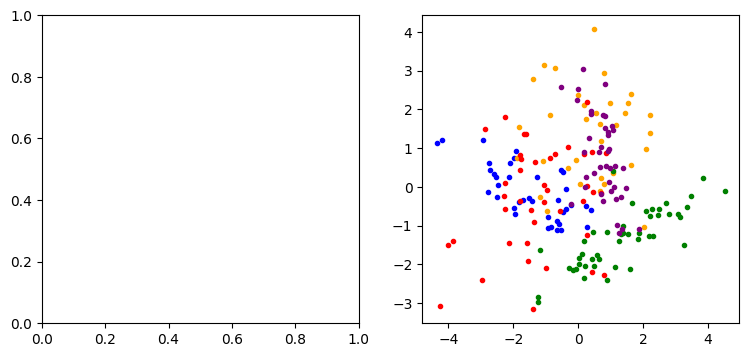

In [38]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)
colors=['blue', 'orange', 'green', 'red', 'purple']

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    
for k in np.unique(Y_train):
    ax[1].plot(X_train2[Y_train==k, 0], 
               X_train2[Y_train==k, 1], '.', color=colors[k])
    

for ind in Omega:
    ax[1].scatter([X_train2[ind, 0]], 
                  [X_train2[ind, 1]], color=colors[Y_train[ind]])
    
plot_decision_regions(X_test2, Y_test, model, ax=ax[0])

plt.show()